In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Display the graph of any college in any year

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


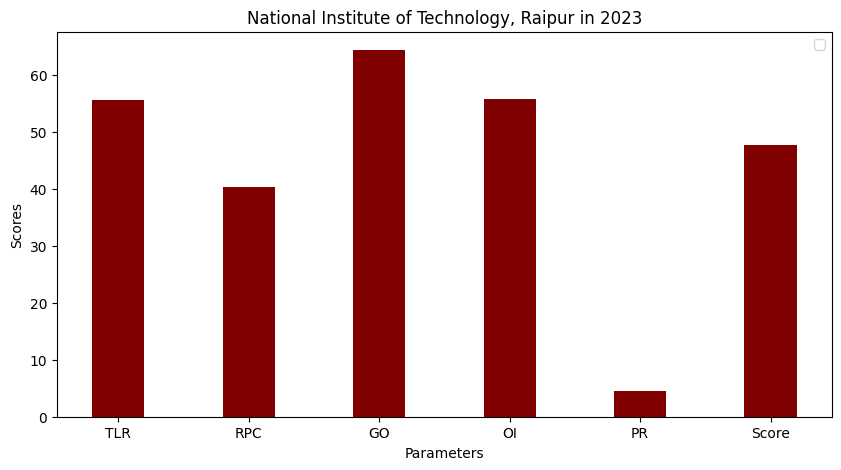

In [19]:
college = "National Institute of Technology, Raipur"
year = 2023
df = pd.read_csv(f'./nirf/{year}.csv')
dict_data = df[df['Name'] == college].to_dict(orient='records')[0]

x_axis = ['TLR', 'RPC', 'GO', 'OI', 'PR', 'Score']
y_axis = []
for i in x_axis:
  y_axis.append(dict_data[i])

fig = plt.figure(figsize = (10, 5))
plt.bar(x_axis, y_axis, color ='maroon', width = 0.4)
plt.xlabel("Parameters")
plt.ylabel("Scores")
plt.title(f"{college} in {year}")
plt.show()

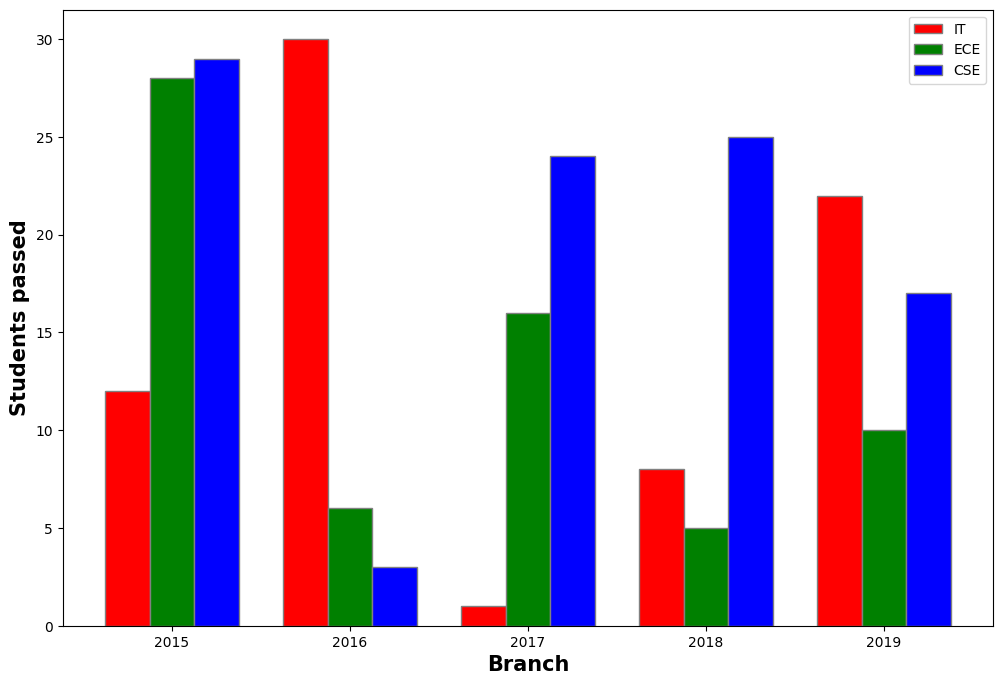

In [64]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar 
IT = [12, 30, 1, 8, 22] 
ECE = [28, 6, 16, 5, 10] 
CSE = [29, 3, 24, 25, 17] 

# Set position of bar on X axis 
br1 = np.arange(len(IT)) 
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth, 
        edgecolor ='grey', label ='IT') 
plt.bar(br2, ECE, color ='g', width = barWidth, 
        edgecolor ='grey', label ='ECE') 
plt.bar(br3, CSE, color ='b', width = barWidth, 
        edgecolor ='grey', label ='CSE')

# Adding Xticks 
plt.xlabel('Branch', fontweight ='bold', fontsize = 15) 
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(IT))], 
        ['2015', '2016', '2017', '2018', '2019'])

plt.legend()
plt.show()

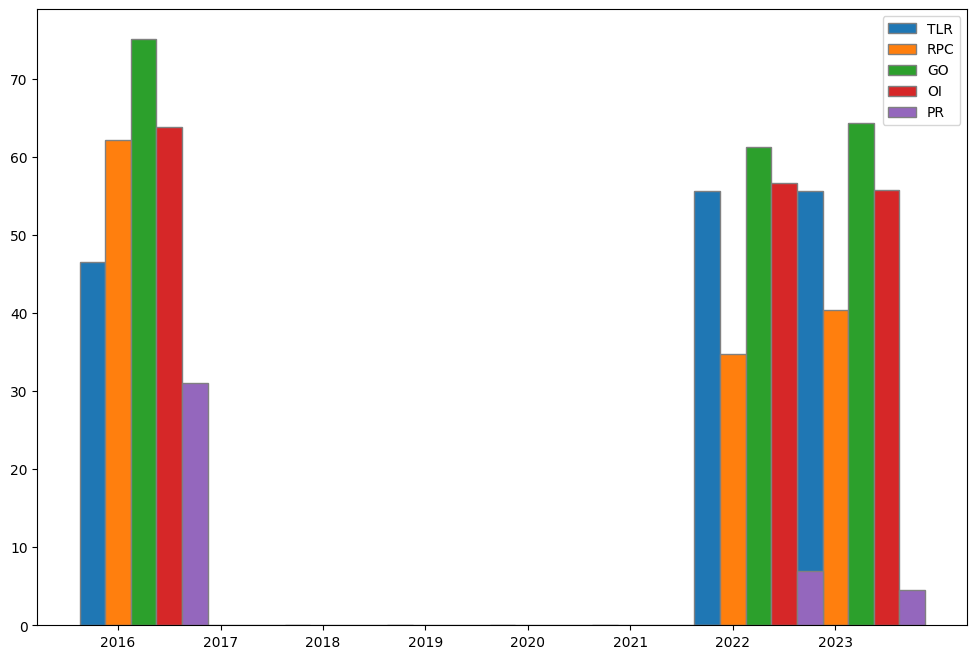

In [99]:
college = "National Institute of Technology, Raipur"
data = {
"TLR": [],
"RPC": [],
"GO": [],
"OI": [],
"PR": [],
}

for year in range(2016, 2024):
  df = pd.read_csv(f'./nirf/{year}.csv')
  df['Name'] = df['Name'].str.upper()
  tmp = df[df['Name'] == college.upper()].to_dict(orient='records')
  flag = 0
  if len(tmp) == 0:
    flag = 1
  
  if not flag:
    tmp = tmp[0]
  for type in data.keys():
    if not flag:
      data[type].append(tmp[type])
    else:
      data[type].append(0)


barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br = np.arange(len(data[type]))
flag = 0

for type in data.keys():
  if not flag:
    plt.bar(br, data[type], width=barWidth, edgecolor ='grey', label=type)
    flag = 1
  else:
    br = [x + barWidth for x in br]
    plt.bar(br, data[type], width=barWidth, edgecolor ='grey', label=type)

plt.legend()
plt.xticks([r + barWidth for r in range(len(data['TLR']))], ['2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023'])
plt.show()

### Plot the required features of any college for all the years

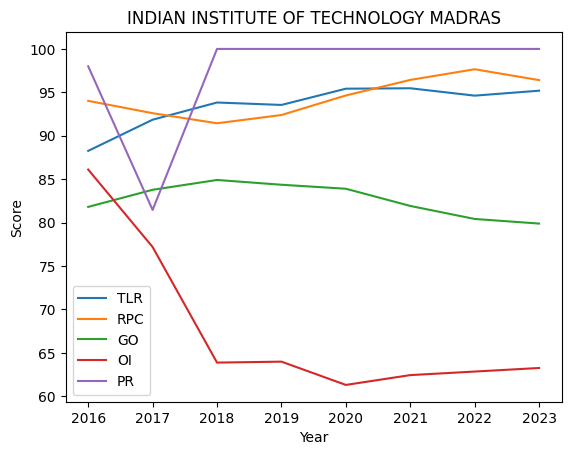

In [23]:
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
college = "Indian Institute Of Technology, Madras"
type_required = ['TLR', 'RPC', 'GO', 'OI', 'PR']
data = {type: [] for type in type_required}

for y in years:
  df = pd.read_csv(f'./nirf/{y}.csv')
  df['Name'] = df['Name'].str.upper()
  df['Name'] = df['Name'].str.replace(",", "")
  college = college.upper()
  college = college.replace(",", "")
  df = df[df['Name'] == college].to_dict(orient='records')
  flag = 0
  if len(df) == 0:
    flag = 1
  
  if not flag:
    df = df[0]

  for type in type_required:
    if not flag:
      data[type].append(df[type])
    else:
      data[type].append(0)

for type in data.keys():
  plt.plot(years, data[type], label=type)

plt.title(college)
plt.ylabel("Score")
plt.xlabel("Year")
plt.legend()
plt.show()